In [1]:
# From http://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html

In [2]:
import logging
from time import time

from numpy.random import RandomState
import matplotlib.pyplot as plt

import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.cluster import MiniBatchKMeans
from sklearn import decomposition

%matplotlib inline

In [3]:
# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')

In [4]:
n_row, n_col = 2, 3
n_components = n_row * n_col
image_shape = (64, 64)
rng = RandomState(0)

In [5]:
# Load faces data
dataset = fetch_olivetti_faces(shuffle=True, random_state=rng)

In [6]:
faces = dataset.data

n_samples, n_features = faces.shape

# global centering
faces_centered = faces - faces.mean(axis=0)

# local centering
faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)

print("Dataset consists of %d faces" % n_samples)

Dataset consists of 400 faces


In [7]:
def plot_gallery(title, images, n_col=n_col, n_row=n_row):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=9)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=plt.cm.gray,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    #plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

In [8]:
# List of the different estimators, whether to center and transpose the
# problem, and whether the transformer uses the clustering API.
estimators = [
    ('Eigenfaces - RandomizedPCA',
     decomposition.RandomizedPCA(n_components=n_components, whiten=True),
     True),

    ('Non-negative components - NMF',
     decomposition.NMF(n_components=n_components, init='nndsvda', tol=5e-3),
     False),

    ('Independent components - FastICA',
     decomposition.FastICA(n_components=n_components, max_iter=2000, tol=1e-4),
     True),

    ('Sparse comp. - MiniBatchSparsePCA',
     decomposition.MiniBatchSparsePCA(n_components=n_components, alpha=0.8,
                                      n_iter=100, batch_size=3,
                                      random_state=rng),
     True),

    ('MiniBatchDictionaryLearning',
        decomposition.MiniBatchDictionaryLearning(n_components=15, alpha=0.1,
                                                  n_iter=50, batch_size=3,
                                                  random_state=rng),
     True),

    ('Cluster centers - MiniBatchKMeans',
        MiniBatchKMeans(n_clusters=n_components, tol=1e-3, batch_size=20,
                        max_iter=50, random_state=rng),
     True),

    ('Factor Analysis components - FA',
     decomposition.FactorAnalysis(n_components=n_components, max_iter=10),
     True),
]

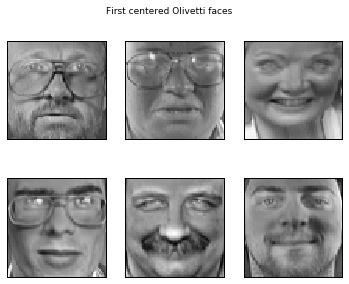

In [9]:
# Plot a sample of the input data
plot_gallery("First centered Olivetti faces", faces_centered[:n_components])

In [10]:
def norm2(myvec):
    return np.sum(np.square(myvec),axis=1)

Extracting the top 6 Eigenfaces - RandomizedPCA...
done in 0.063s
Extracting the top 6 Non-negative components - NMF...
done in 0.261s
Extracting the top 6 Independent components - FastICA...
done in 0.143s
Extracting the top 6 Sparse comp. - MiniBatchSparsePCA...
done in 1.182s
Extracting the top 6 MiniBatchDictionaryLearning...
done in 0.776s
Extracting the top 6 Cluster centers - MiniBatchKMeans...
done in 0.125s
Extracting the top 6 Factor Analysis components - FA...
done in 0.154s


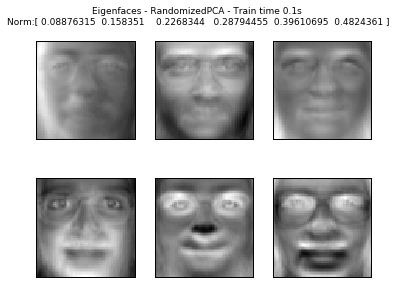

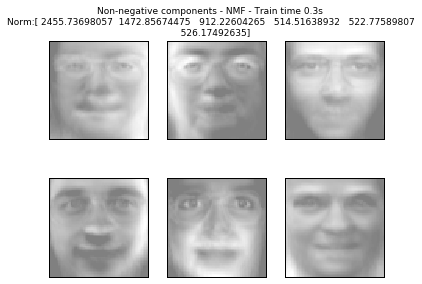

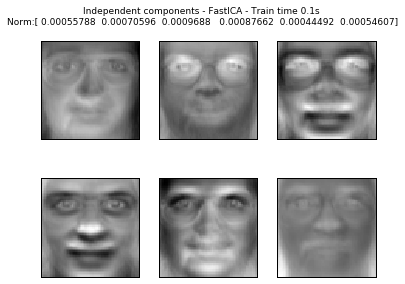

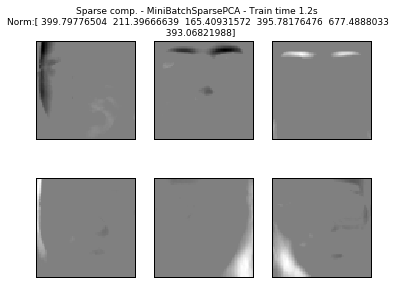

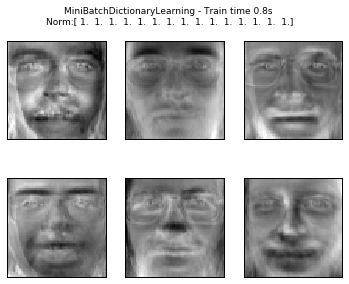

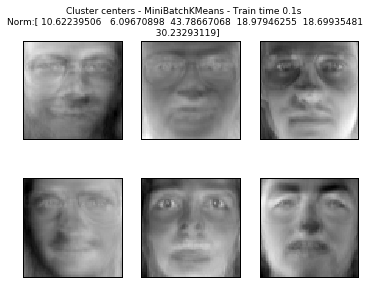

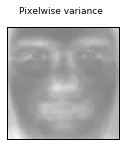

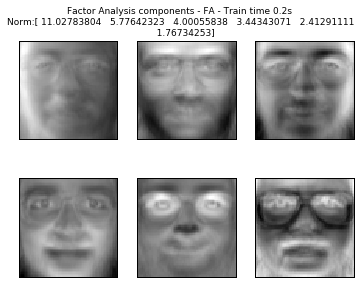

In [11]:
# Do the estimation and plot it

for name, estimator, center in estimators:
    print("Extracting the top %d %s..." % (n_components, name))
    t0 = time()
    data = faces
    if center:
        data = faces_centered
    estimator.fit(data)
    train_time = (time() - t0)
    print("done in %0.3fs" % train_time)
    if hasattr(estimator, 'cluster_centers_'):
        components_ = estimator.cluster_centers_
    else:
        components_ = estimator.components_
    if hasattr(estimator, 'noise_variance_'):
        plot_gallery("Pixelwise variance",
                     estimator.noise_variance_.reshape(1, -1), n_col=1,
                     n_row=1)
    plot_gallery('%s - Train time %.1fs \nNorm:%s' % (name, train_time, np.array_str(norm2(components_))),
                 components_[:n_components])

plt.show()